24 28


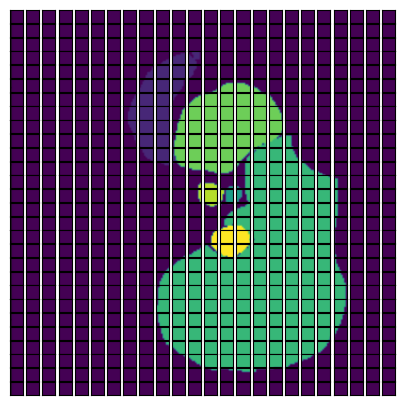

In [4]:
import torchvision, torch
from matplotlib import pyplot as plt

img = torchvision.io.read_image('./dataset/exp/patchify.jpg').permute(1, 2, 0)

H, W, C = img.shape

patch_width = 25
n_rows = H // patch_width
n_cols = W // patch_width
print(n_cols, n_rows)

cropped_img = img[:n_rows * patch_width, :n_cols * patch_width, :]

#
# Into patches
# [n_rows, n_cols, patch_width, patch_width, C]
#
patches = torch.empty(n_rows, n_cols, patch_width, patch_width, C)
for chan in range(C):
    patches[..., chan] = (
        cropped_img[..., chan]
        .reshape(n_rows, patch_width, n_cols, patch_width)
        .permute(0, 2, 1, 3)
    )
    
#
#Plot
#
f, axs = plt.subplots(n_rows, n_cols, figsize=(5, 5))

for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        axs[row_idx, col_idx].imshow(patches[row_idx, col_idx, ...] / 255)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
f.subplots_adjust(wspace=0.05, hspace=0.05)